In [2]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/building_permits.csv', low_memory=False)[['zip', 'declared_valuation', 'description']]

In [5]:
df.head(10)

,zip,declared_valuation,description
0,02109,"$36,500.00",Interior/Exterior Work
1,02132,"$40,000.00",City of Boston
2,02129,"$5,000.00",Other
3,02118,"$74,295.75",Interior/Exterior Work
4,02135,"$15,000.00",Renovations - Exterior
5,02134,$1.00,Renovations - Interior NSC
6,02134,"$50,000.00",Renovations - Interior NSC
7,02114,$0.00,Interior/Exterior Work
8,02119,$0.00,Renovations - Interior NSC
9,02130,"$10,000.00",Interior/Exterior Work


In [6]:
df.dtypes

zip                   object
declared_valuation    object
description           object
dtype: object

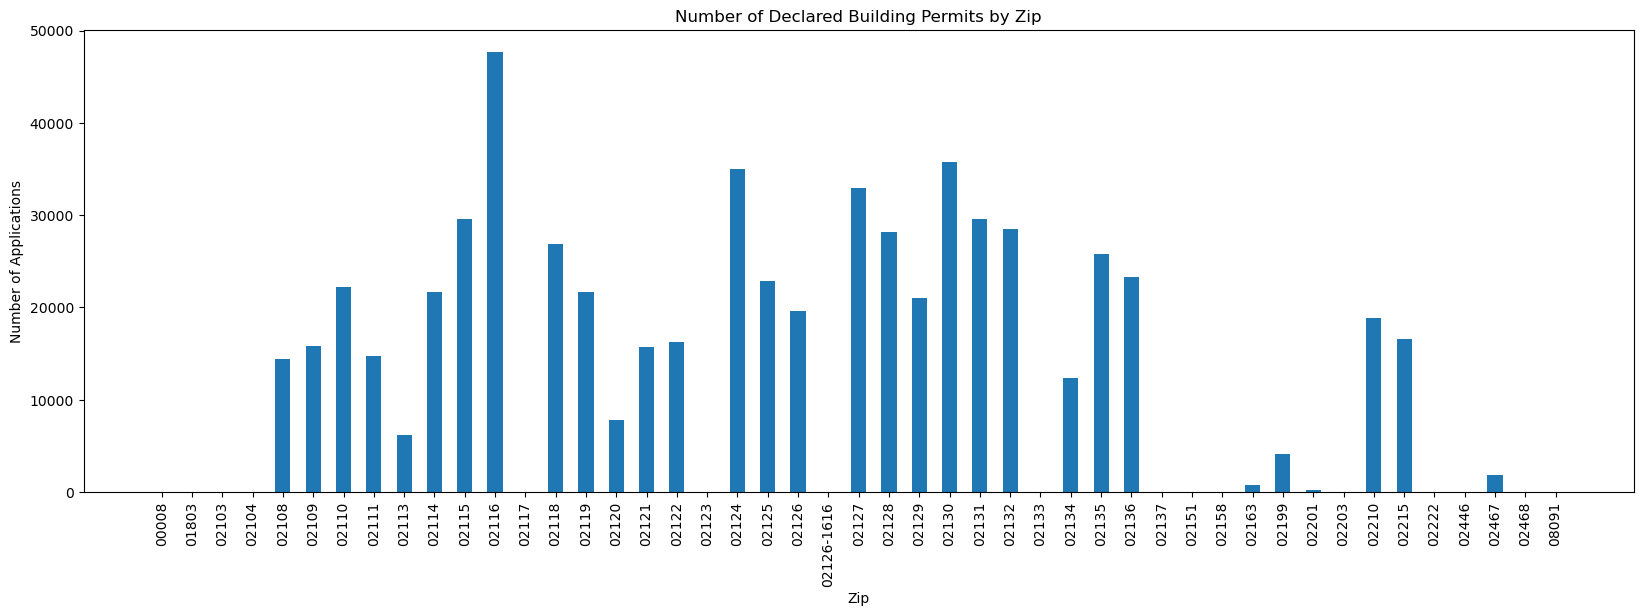

In [7]:
df = df.dropna(subset=['zip'])
df['zip'] = df['zip'].astype(str)
df['zip'] = df['zip'].str.zfill(5)
df = df.sort_values(by=['zip'])

counts = df['zip'].value_counts().sort_index()
plt.figure(figsize=(20,6)) 
plt.bar(counts.index, height=counts.values, width=.5)
plt.xlabel('Zip')
plt.title('Number of Declared Building Permits by Zip')
plt.ylabel('Number of Applications')

plt.xticks(rotation=90)
plt.show()

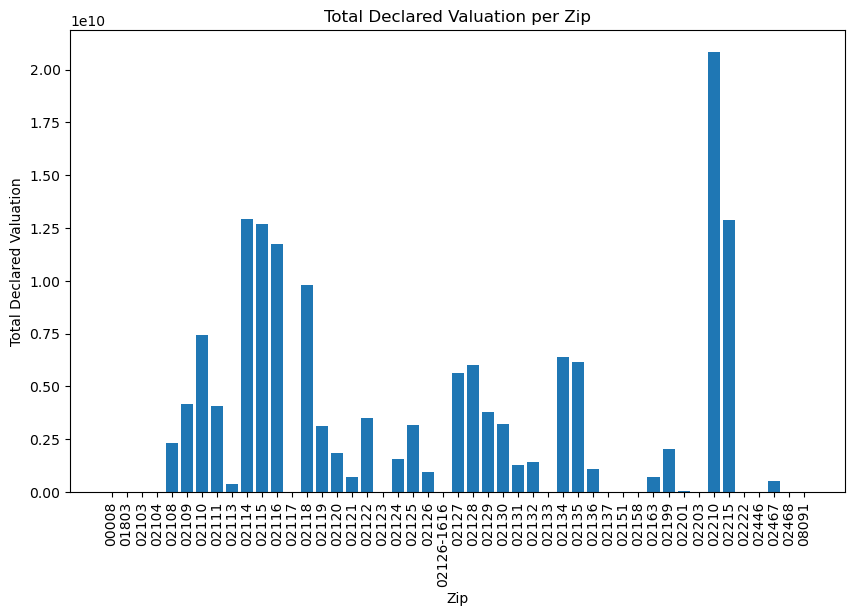

In [8]:
df['declared_valuation'] = df['declared_valuation'].replace('[\$,]', '', regex=True).astype(float)

# Group by 'zip' and sum 'declared_valuation'
df_grouped = df.groupby('zip')['declared_valuation'].sum().reset_index()

# Ensure 'zip' is of type str for plotting
df_grouped['zip'] = df_grouped['zip'].astype(str)

plt.figure(figsize=(10,6))
plt.bar(df_grouped['zip'], df_grouped['declared_valuation'])
plt.xlabel('Zip')
plt.ylabel('Total Declared Valuation')
plt.title('Total Declared Valuation per Zip')
plt.xticks(rotation=90)
plt.show()
